In [1]:
import sys
sys.path.append('../../Share')
import config
import baseline
import Target

import numpy as np
import pandas as pd

In [3]:
baseline_K_val = [1, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46]

if __name__ == "__main__":
    for K in baseline_K_val:
        trainer = baseline.TremorModelTrainer(config, subject="Hunmin")
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../../Results/Results_Hunmin/Baseline_results_train_with_{K}data_H.csv')

# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨'''

Dataset 1/51 - Session Exp_2025-05-27/E8331D05289A/
(8539, 4, 14, 1) (8539,) (86, 4, 14, 1) (86,)
Dataset 2/51 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 91.31%
Maximum validation accuracy : 95.35%
Accuracy of test dataset using model V0: 95.3488%
Dataset 3/51 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 80.9618%
Dataset 4/51 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 86.8919%
Dataset 5/51 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Accuracy on unseen dataset: 86.2105%
Dataset 6/51 - Session Exp_2025-06-20-v4/E9AD0E7DCC2B/
Accuracy on unseen dataset: 71.8920%
Dataset 7/51 - Session Exp_2025-06-20-v5/E9AD0E7DCC2B/
Accuracy on unseen dataset: 74.9360%
Dataset 8/51 - Session Exp_2025-06-20-v6/E9AD0E7DCC2B/
Accuracy on unseen dataset: 75.4372%
Dataset 9/51 - Session Exp_2025-06-20-v7/E9AD0E7DCC2B/
Accuracy on unseen dataset: 69.6885%
Dataset 10/51

In [9]:
b_path = 'C:/Users/hml76/PycharmProjects/Tremor_project_local/NCI_mindforce'
baseline_K = ['1', '6', '10', '14', '18', '22', '26', '30', '34', '38', '42', '46']
baselines = []

for idx, K in enumerate(baseline_K):
    baselines.append(b_path + f'/github/Results/Results_Hunmin/Baseline_results_train_with_{K}data_H.csv')

SUBJECT = "Hunmin"

In [ ]:
prog_trainer = Target.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)

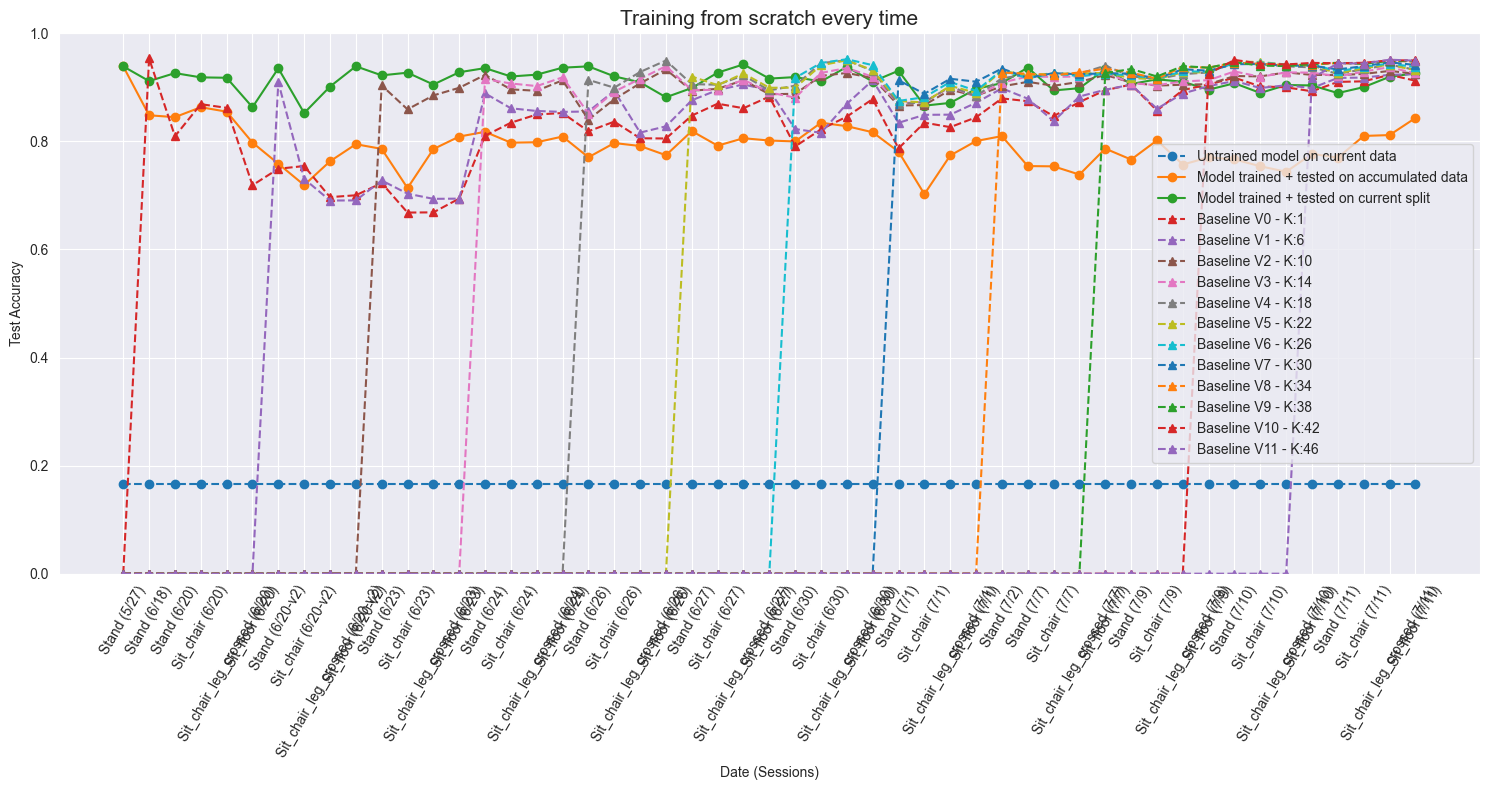

Average of acc without training anything (should be random): 11.49%
Average of acc using previous test data after training: 91.22%
Average of acc using current test data after training: 79.23%
Baseline K-1: 83.55%
Baseline K-6: 85.20%
Baseline K-10: 90.38%
Baseline K-14: 91.02%
Baseline K-18: 92.09%
Baseline K-22: 92.22%
Baseline K-26: 92.63%
Baseline K-30: 92.81%
Baseline K-34: 93.60%
Baseline K-38: 93.94%
Baseline K-42: 94.43%
Baseline K-46: 94.13%


In [10]:
prog_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")